In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy import stats
from scipy.stats import t
from scipy.stats import norm

%matplotlib inline


# Dependencies

from typing import Union, List, Any, Dict
from pandas import DataFrame, Series, read_csv, to_datetime
import matplotlib.pyplot as plt



# 1. Data download.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Bitcoin_Blockchain_Historical_Data.csv'
dataset = pd.read_csv(file_path)
dataset["datetime"] = to_datetime(dataset["timestamp"], unit="ms")

dataset.head()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,datetime
0,1,1231469665000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 02:54:25
1,2,1231469744000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 02:55:44
2,3,1231470173000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:02:53
3,4,1231470988000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:16:28
4,5,1231471428000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:23:48


# 2. Main Statistics.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810909 entries, 0 to 810908
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   height           810909 non-null  int64         
 1   timestamp        810909 non-null  int64         
 2   size             810909 non-null  int64         
 3   tx_count         810909 non-null  int64         
 4   difficulty       810909 non-null  float64       
 5   median_fee_rate  810909 non-null  float64       
 6   avg_fee_rate     810909 non-null  int64         
 7   total_fees       810909 non-null  int64         
 8   fee_range_min    810909 non-null  float64       
 9   fee_range_max    810909 non-null  float64       
 10  input_count      810909 non-null  int64         
 11  output_count     810909 non-null  int64         
 12  output_amount    810909 non-null  int64         
 13  datetime         810909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)

In [5]:
dataset.describe()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount
count,810909.000000,8.109090e+05,8.109090e+05,810909.000000,8.109090e+05,8.109090e+05,8.109090e+05,8.109090e+05,810909.000000,8.109090e+05,810909.000000,810909.000000,8.109090e+05
mean,405455.000000,1.463145e+12,6.368604e+05,1114.228252,7.821774e+12,5.471805e+01,9.278163e+01,3.338226e+07,9.402941,2.077464e+11,2901.063285,3124.744520,1.040484e+12
std,234089.409057,1.316681e+11,6.049152e+05,1123.477520,1.309055e+13,1.200296e+03,1.878187e+03,9.149828e+07,147.243597,1.870766e+14,2703.436749,3286.867946,3.474395e+12
min,1.000000,1.231470e+12,1.760000e+02,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,202728.000000,1.349909e+12,3.443600e+04,70.000000,2.968775e+06,1.000000e+00,1.000000e+01,1.990533e+06,0.000000,2.240000e+02,158.000000,171.000000,8.352319e+10
50%,405455.000000,1.459631e+12,4.578980e+05,682.000000,1.668515e+11,1.400000e+01,2.900000e+01,1.055251e+07,1.000000,4.710000e+02,2115.000000,1866.000000,4.009393e+11
75%,608182.000000,1.576390e+12,1.152508e+06,2098.000000,1.300809e+13,5.000000e+01,8.200000e+01,3.127132e+07,1.000000,1.295000e+03,5411.000000,5537.000000,1.130377e+12
max,810909.000000,1.696600e+12,3.978938e+06,12239.000000,5.732151e+13,1.029502e+06,1.143052e+06,2.915328e+10,56155.000000,1.684634e+17,20894.000000,23642.000000,6.499324e+14


from matplotlib import pyplot as plt
_df_0['height'].plot(kind='hist', bins=20, title='height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['size'].plot(kind='hist', bins=20, title='size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['tx_count'].plot(kind='hist', bins=20, title='tx_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='height', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='timestamp', y='size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='size', y='tx_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='tx_count', y='difficulty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['height']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('height')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['tx_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('tx_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['difficulty']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('difficulty')

from matplotlib import pyplot as plt
_df_12['height'].plot(kind='line', figsize=(8, 4), title='height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['size'].plot(kind='line', figsize=(8, 4), title='size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['tx_count'].plot(kind='line', figsize=(8, 4), title='tx_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
missing_values = dataset.isnull().sum()

print('Statistics of missing values: ')
print(missing_values)

Statistics of missing values: 
height             0
timestamp          0
size               0
tx_count           0
difficulty         0
median_fee_rate    0
avg_fee_rate       0
total_fees         0
fee_range_min      0
fee_range_max      0
input_count        0
output_count       0
output_amount      0
datetime           0
dtype: int64


# 3. Correlation Matrix.

<ipython-input-7-0b570fd866be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr(method = 'pearson').round(2)


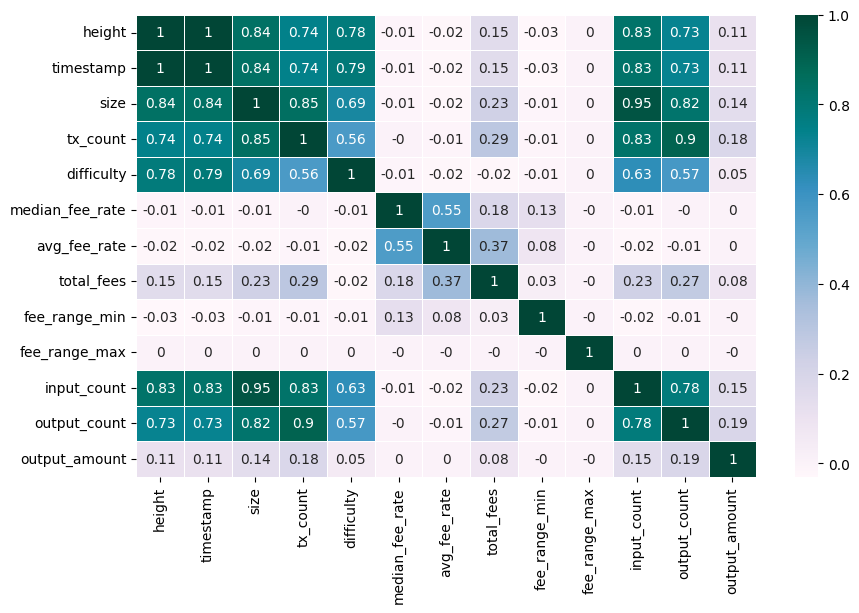

In [7]:
plt.figure(figsize=(10,6))
corr_matrix = dataset.corr(method = 'pearson').round(2)
sns.heatmap(data = corr_matrix, annot = True, cmap = 'PuBuGn', linewidth = 0.7)
plt.show()

# 4. Relationships between variables.

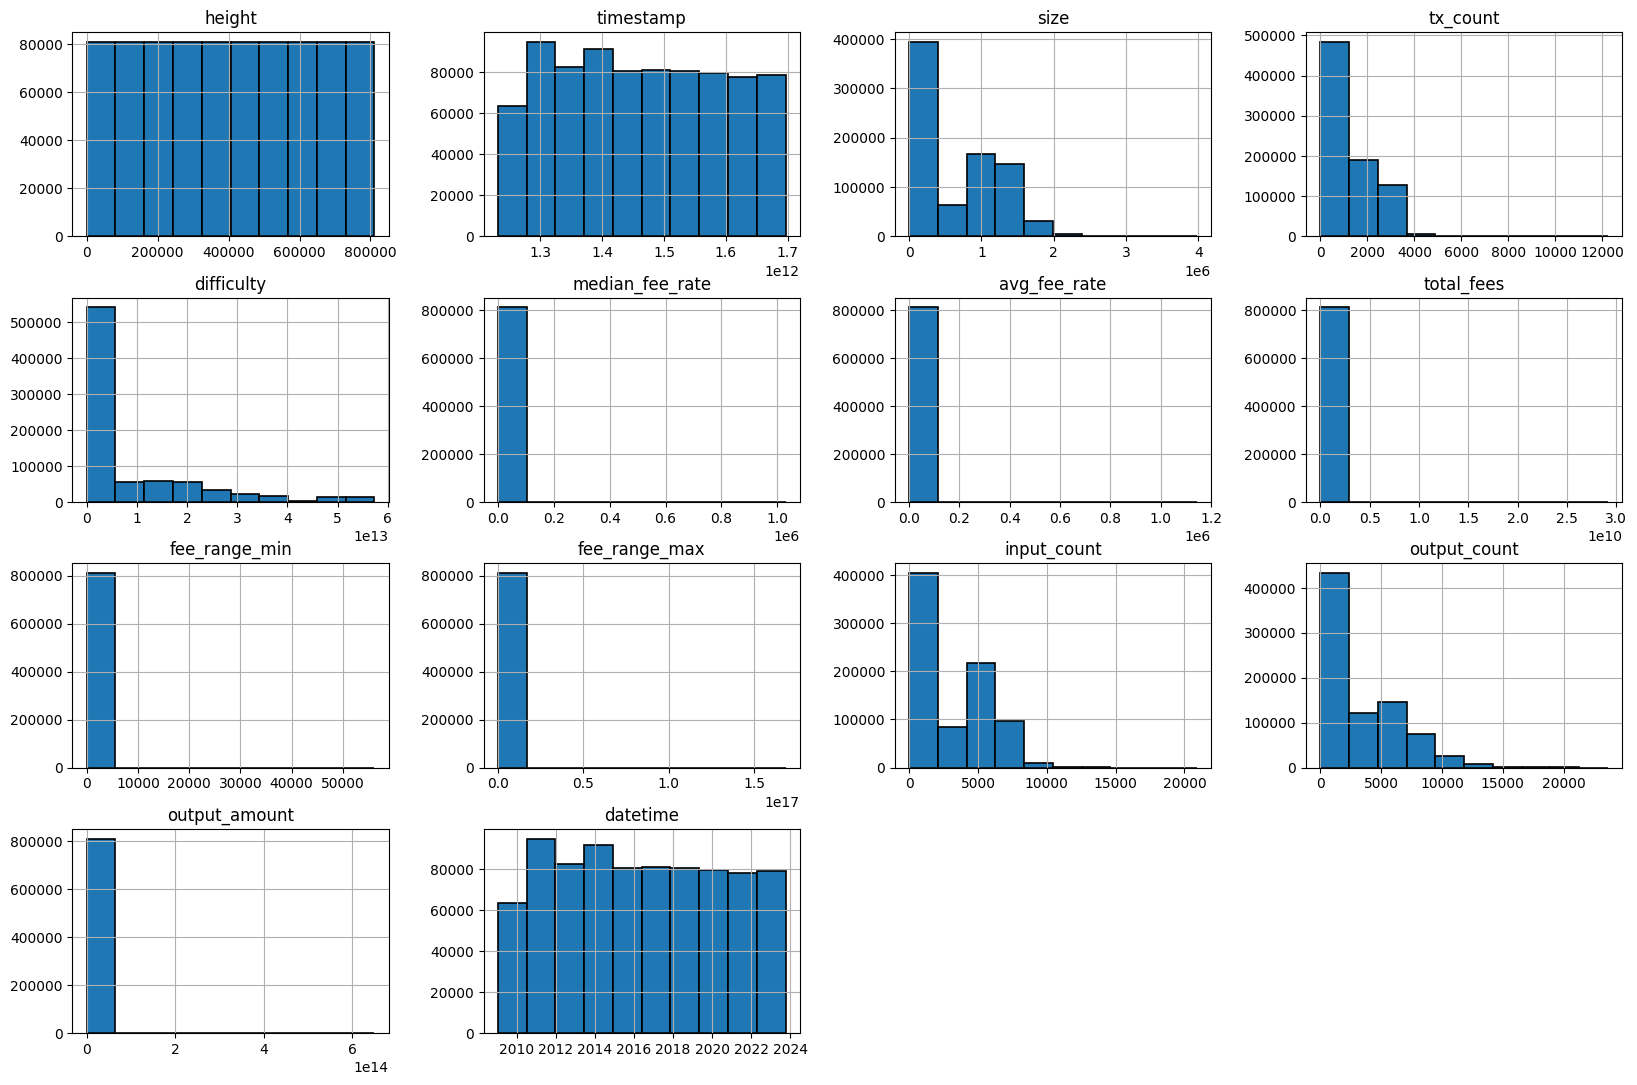

In [8]:
dataset.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(20, 13)
plt.show()

* Add new column 'Year' to dataset. Which contain year of transection.

In [85]:
# *Lets Create a column that hold year of the transection*

import datetime
def extract_year_from_timestamp_milliseconds(timestamp):
    try:
        # Convert milliseconds to seconds
        timestamp_seconds = timestamp / 1000
        return datetime.datetime.fromtimestamp(timestamp_seconds).year
    except (ValueError, OSError):
        return None # Handle invalid timestamps

# Create a new DataFrame to store the result and add the 'year' column

dataset_result = dataset.copy()
dataset_result['year'] = dataset_result['timestamp'].apply(extract_year_from_timestamp_milliseconds)

dataset_result.head(10)




,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,datetime,year
0,1,1231469665000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 02:54:25,2009
1,2,1231469744000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 02:55:44,2009
2,3,1231470173000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:02:53,2009
3,4,1231470988000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:16:28,2009
4,5,1231471428000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:23:48,2009
5,6,1231471789000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:29:49,2009
6,7,1231472369000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:39:29,2009
7,8,1231472743000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:45:43,2009
8,9,1231473279000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:54:39,2009
9,10,1231473952000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 04:05:52,2009


In [10]:
ds = dataset_result
ds["datetime"] = to_datetime(ds["timestamp"], unit="ms")

ds.tail()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,datetime,year
810904,810905,1696596349000,1427754,2288,5.732151e+13,6.823732,23,23663392,3.981087,365.700185,7335,7223,1160691582276,2023-10-06 12:45:49,2023
810905,810906,1696596615000,1612966,2016,5.732151e+13,3.992902,15,15483511,2.002928,1113.424658,8874,5749,463722361068,2023-10-06 12:50:15,2023
810906,810907,1696599420000,1486563,3496,5.732151e+13,52.845687,63,63223285,47.189516,1508.012821,6070,14579,2469100614701,2023-10-06 13:37:00,2023
810907,810908,1696599441000,1647105,3397,5.732151e+13,45.994549,44,44811365,33.665904,531.342012,8333,9388,510973071832,2023-10-06 13:37:21,2023
810908,810909,1696599727000,1569768,2691,5.732151e+13,25.035653,31,31089016,11.251142,434.092474,7679,8304,1877353542478,2023-10-06 13:42:07,2023


This Picture below shows Price of Bitcoin from year 2009 to Aug-2023



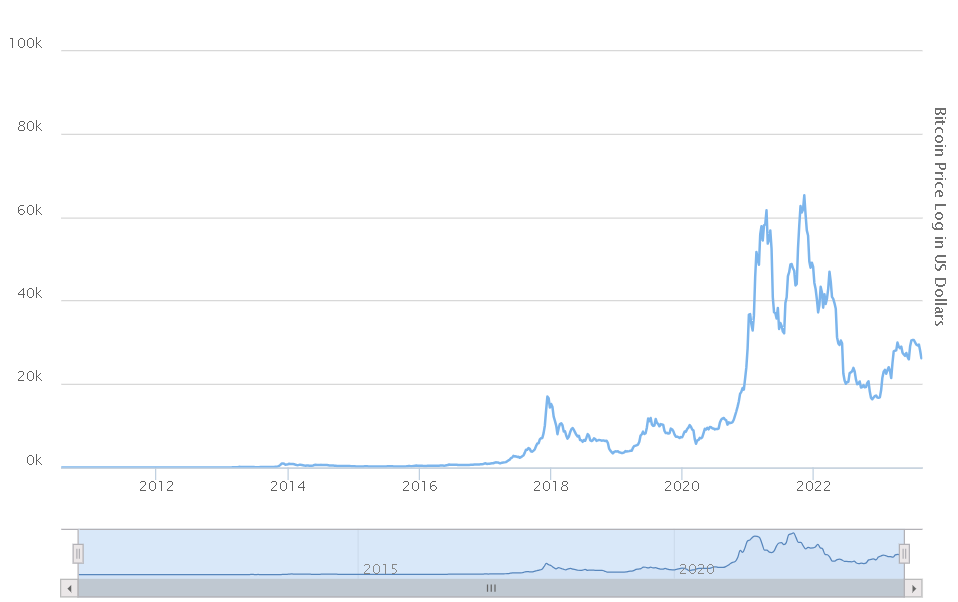

Year Based Analysis

<ipython-input-11-dbc26dd380c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = block_numbers.index, y = block_numbers.values, palette = 'hls' )


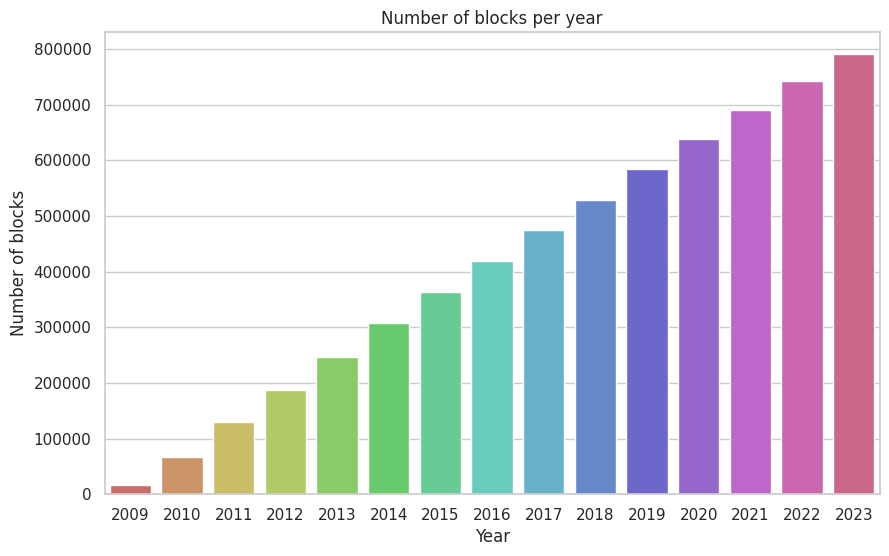

In [11]:
# @title Number of blocks per year

sns.set(style = 'whitegrid')
block_numbers = dataset_result.groupby('year')['height'].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = block_numbers.index, y = block_numbers.values, palette = 'hls' )

plt.xlabel('Year')
plt.ylabel('Number of blocks')
plt.title('Number of blocks per year')

plt.show()

Height

The height stands for the number of blocks that have been confirmed in the Bitcoin Blockchain. When creating this notebook, the height of the Bitcoin network was at #800213.



# 4. Relationships between variables:

In [84]:

## Helpers ##

from typing import Union, List, Any, Dict
from pandas import DataFrame, Series, read_csv, to_datetime

def plot(x: Union[List[Any], Series], y: Union[List[Any], Series], ylabel: str, title: Union[str, None] = None):
    fig = plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.ylabel(ylabel)
    plt.xticks( rotation=25 )
    plt.title(title if title is not None else "")
    plt.show()

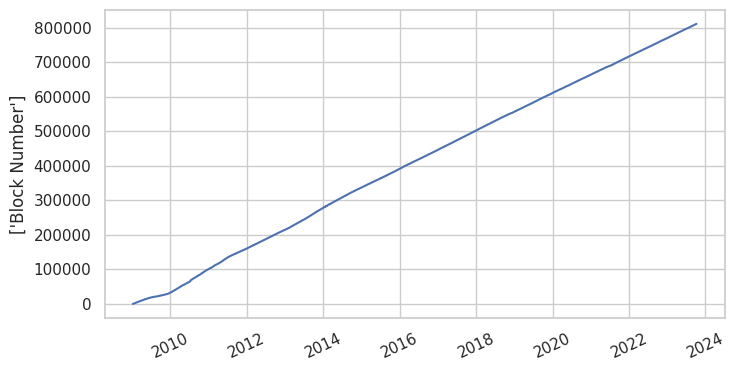

In [13]:
plot(x = ds['datetime'], y = ds['height'], ylabel = ['Block Number'])

Transaction Size

When pushing a transaction to the Bitcoin Network, its size varies depending on its contents. The average size for a simple transaction (1 input and 2 outputs) weights around ~200 bytes. Nevertheless, the only limit is the size of the block, which is ~1 megabyte.



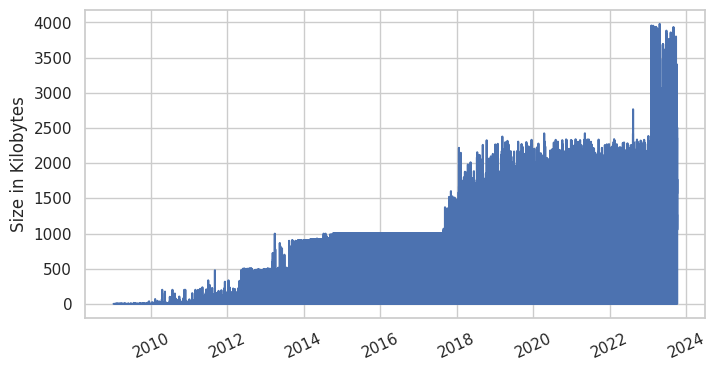

In [14]:
plot(x=ds['datetime'], y = ds['size'].apply(lambda x: x / 1000), ylabel = 'Size in Kilobytes')

Transaction Count


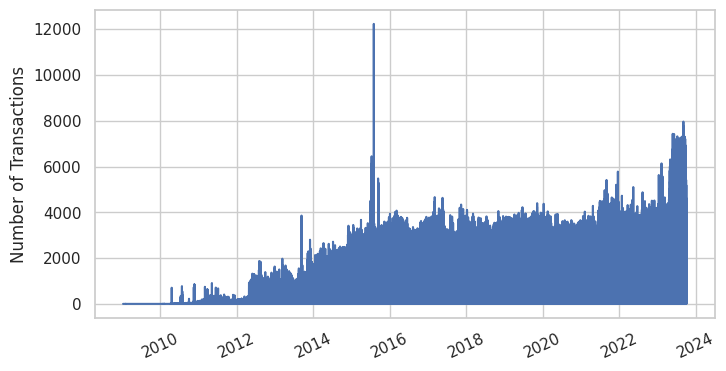

In [15]:
plot(x = ds['datetime'], y = ds['tx_count'], ylabel = 'Number of Transactions')

**Network Difficulty**

The mining difficulty is a dynamic value that varies based on the hashing power. In other words, the more miners, the higher the difficulty. This is a security mechanism that adjusts itself every ~2 weeks, and its only goal is to ensure blocks are mined every ~10 minutes.


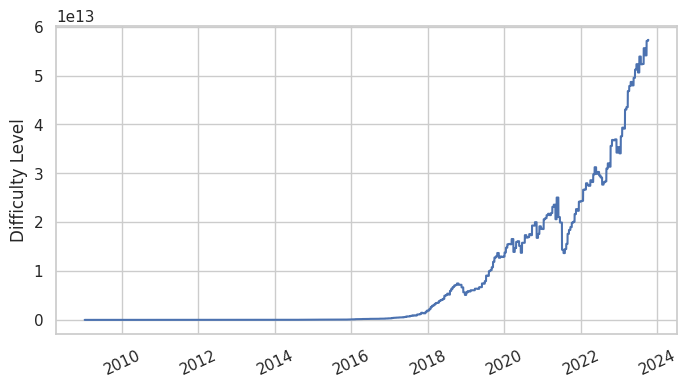

In [16]:
plot(x = ds['datetime'], y = ds['difficulty'], ylabel = 'Difficulty Level')


**Inputs & Outputs**

When sending BTC, the inputs stand for the origin of the funds and the outputs for the destination.

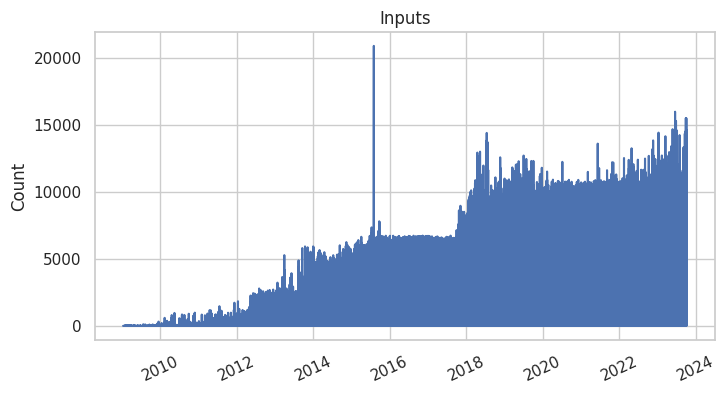

In [17]:
plot(x = ds['datetime'], y = ds['input_count'], ylabel = 'Count', title='Inputs')

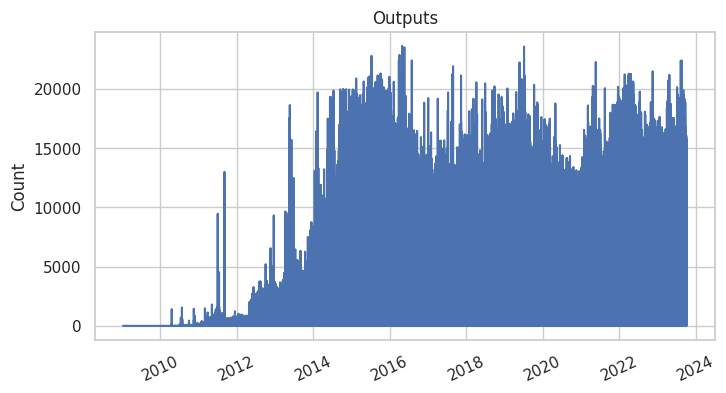

In [18]:
plot(x=ds["datetime"], y=ds["output_count"], ylabel="Count", title="Outputs")


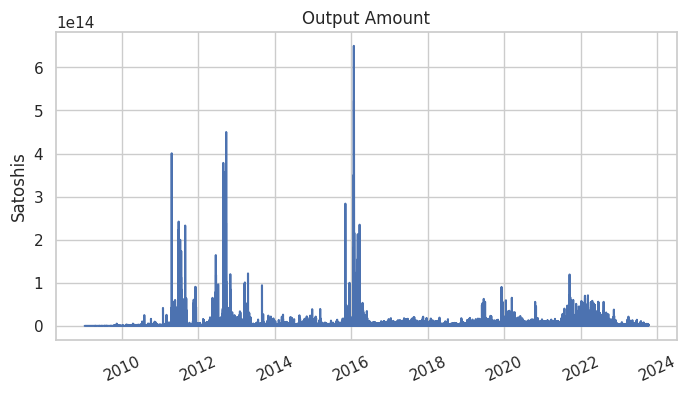

In [19]:
plot(x=ds["datetime"], y=ds["output_amount"], ylabel="Satoshis", title="Output Amount")


**Transaction Fees**

Mathematically, transaction fees are the difference between the amount of bitcoin sent and the amount received. Conceptually, transaction fees are a reflection of the speed with which a user wants their transaction validated on the blockchain.

Keep in mind that there are no rules when it comes to fees. A user can send a transaction paying 0 or 1,000 BTC in fees. If you wish to use the fees as features to train a machine learning model, remove all the outliers, as they may impact the training process negatively.**

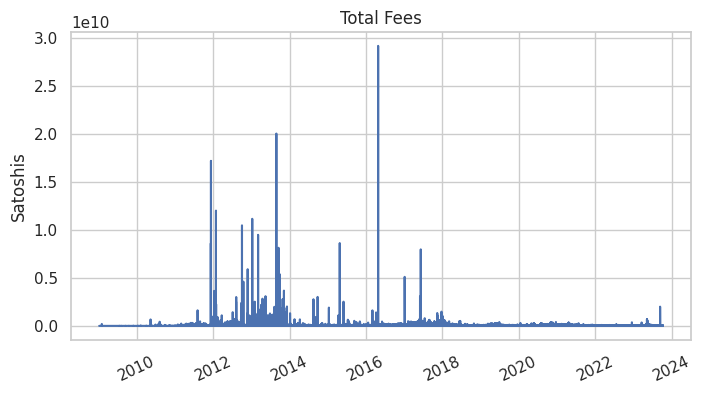

In [20]:
plot(x=ds["datetime"], y=ds["total_fees"], ylabel="Satoshis", title="Total Fees")


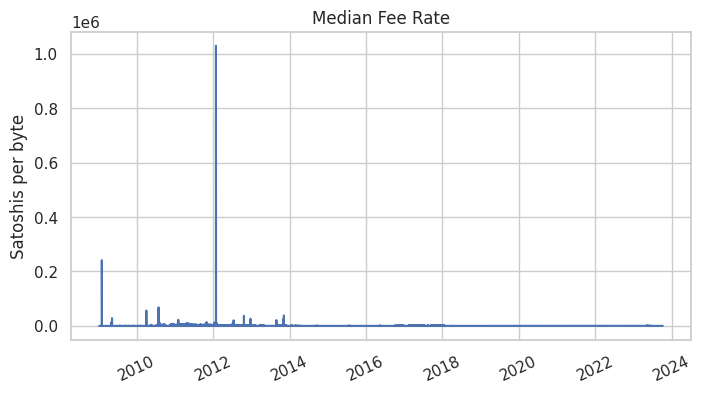

In [21]:
plot(x=ds["datetime"], y=ds["median_fee_rate"], ylabel="Satoshis per byte", title="Median Fee Rate")


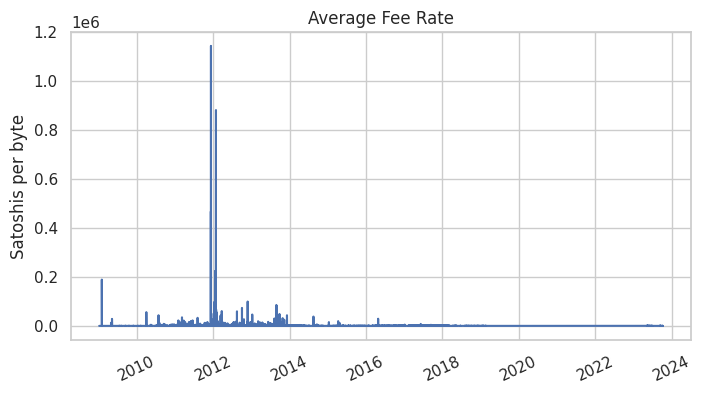

In [22]:
plot(x=ds["datetime"], y=ds["avg_fee_rate"], ylabel="Satoshis per byte", title="Average Fee Rate")


# 5. T - Test

In [23]:
print(ds.var())

height             5.479785e+10
timestamp          1.733648e+22
size               3.659224e+11
tx_count           1.262202e+06
difficulty         1.713624e+26
median_fee_rate    1.440709e+06
avg_fee_rate       3.527585e+06
total_fees         8.371935e+15
fee_range_min      2.168068e+04
fee_range_max      3.499767e+28
input_count        7.308570e+06
output_count       1.080350e+07
output_amount      1.207142e+25
year               1.739824e+01
dtype: float64


<ipython-input-23-987ea4537498>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ds.var())


In [24]:
grouped_data = ds.groupby('year')['size'].mean()

In [30]:
from scipy.stats import ttest_ind

year_1 = ds[ds['year'] == 2010]['size']
year_2 = ds[ds['year'] == 2020]['size']

t_statistic, p_value = ttest_ind(year_1, year_2)

print(t_statistic, p_value)

-917.4840326826818 0.0


In [83]:
from scipy.stats import ttest_ind

# Divide the data into two groups (for example, according to some condition)
group1 = ds['size']
group2 = ds['year']

# Check normality of distribution (data transformation may be required)
# For example, using the Shapiro-Wilk test
from scipy.stats import shapiro
stat, p_value_shapiro_group1 = shapiro(group1)
stat, p_value_shapiro_group2 = shapiro(group2)

# Check the homogeneity of the dispersions (use of a suitable test may be required)
# For example, using Levene's test
from scipy.stats import levene
stat, p_value_levene = levene(group1, group2)

# If the test conditions are met, perform a t-test
if p_value_shapiro_group1 > 0.05 and p_value_shapiro_group2 > 0.05 and p_value_levene > 0.05:
     t_statistic, p_value_ttest = ttest_ind(group1, group2)
     print("t-statistic:", t_statistic)
     print("p-value:", p_value_ttest)
else:
     print("The t-test assumptions do not hold.")

The t-test assumptions do not hold.


In [82]:
# Example of logarithm of data
group1_log = np.log1p(group1)
group2_log = np.log1p(group2)

# Check normality of distribution (data transformation may be required)
# For example, using the Shapiro-Wilk test
from scipy.stats import shapiro
stat, p_value_shapiro_group1 = shapiro(group1)
stat, p_value_shapiro_group2 = shapiro(group2)

# Check the homogeneity of the dispersions (use of a suitable test may be required)
# For example, using Levene's test
from scipy.stats import levene
stat, p_value_levene = levene(group1, group2)

# Repeat assumption checking and t-test with transformed data
if p_value_shapiro_group1 > 0.05 and p_value_shapiro_group2 > 0.05 and p_value_levene > 0.05:
     t_statistic, p_value_ttest = ttest_ind(group1, group2)
     print("t-statistic:", t_statistic)
     print("p-value:", p_value_ttest)
else:
     print("The t-test assumptions do not hold.")

The t-test assumptions do not hold.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
from scipy.stats import mannwhitneyu

# mannwhitneyu
stat, p_value_mannwhitney = mannwhitneyu(group1, group2)

print("Stats:", stat)
print("p-value:", p_value_mannwhitney)


Stats: 563591232225.5
p-value: 0.0


In [79]:
from sklearn.utils import resample

# Bootstrap example

n_iterations = 1000
results = []

for _ in range(n_iterations):
    sample1 = resample(group1)
    sample2 = resample(group2)
    statistic, p_value = ttest_ind(sample1, sample2)
    results.append(statistic)

# Estimate confidence interval, etc.

In [42]:
print(statistic, p_value)

945.6227224465013 0.0


In [81]:
from scipy.stats import mannwhitneyu

# mannwhitneyu

stat, p_value_mannwhitney = mannwhitneyu(group1, group2)

print("Stats:", stat)
print("p-value:", p_value_mannwhitney)


Stats: 563591232225.5
p-value: 0.0


Не наблюдаются предположения касаемо проведения Т-теста. Данные распределенны не нормально, а альтернативные тесты не предоставляют оиждаемые результаты.

There are no assumptions regarding the conduct of the T-test. The data is not normally distributed and alternative tests do not provide the expected results.

# 6. Calculate the number of blocks created in different periods of time  (years). Visualize the results.
   - Рассчитать количество блоков, созданных в различные периоды времени (года). Визуализировать результаты.


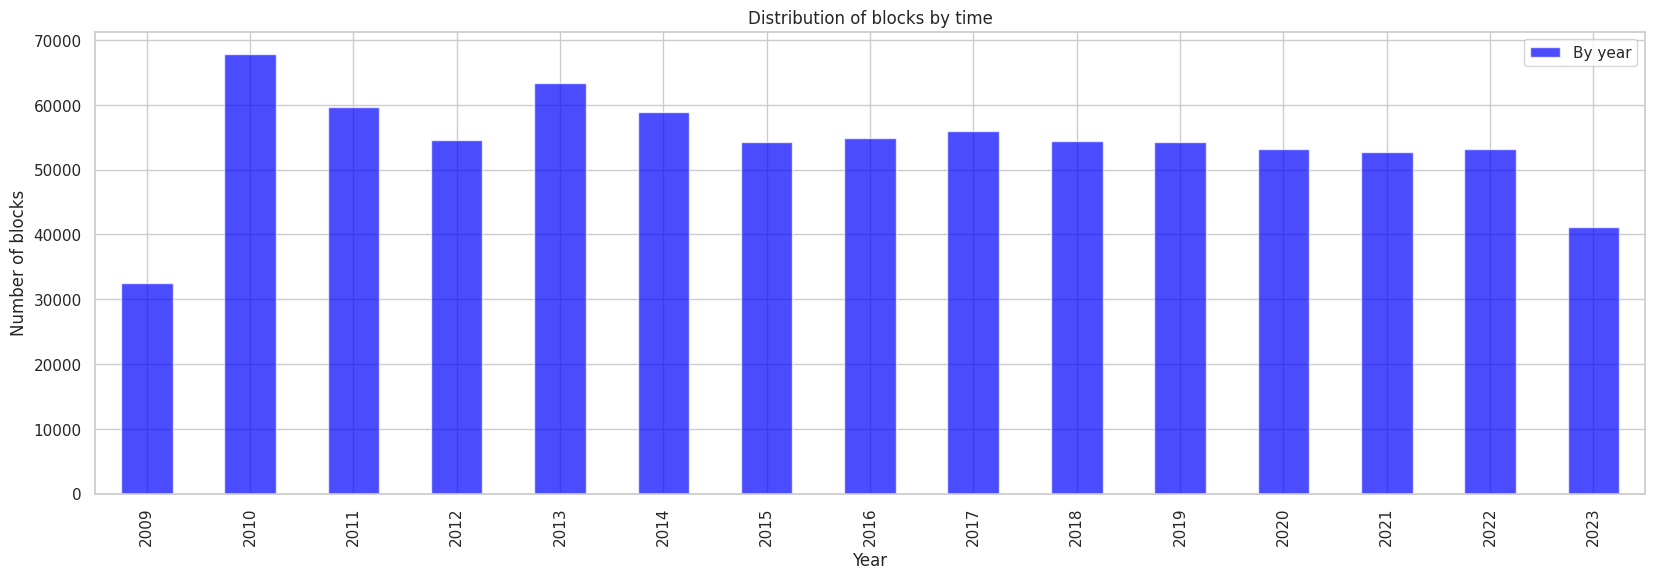

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's assume you have a DataFrame dataset with block information, including timestamp.

# Create new variables for year and month
ds['year'] = pd.to_datetime(ds['timestamp'], unit='ms').dt.year


# Calculate the number of blocks for each year
blocks_by_year = ds.groupby('year')['height'].count()

# Calculate the number of blocks for each month


# Visualize the results
plt.figure(figsize=(20, 6))
blocks_by_year.plot(kind='bar', color='blue', alpha=0.7, label='By year')

plt.xlabel('Year')
plt.ylabel('Number of blocks')
plt.title('Distribution of blocks by time')
plt.legend()
plt.show()

# 7. Show the distribution of transactions by commission. It is possible to use the categories low, medium, high commissions.
   - Показать распределение транзакций по комиссиям. Возможно, использовать категории низкие, средние, высокие комиссии.


<ipython-input-76-4c20922c7ca6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fee_category', data=ds, palette='viridis')


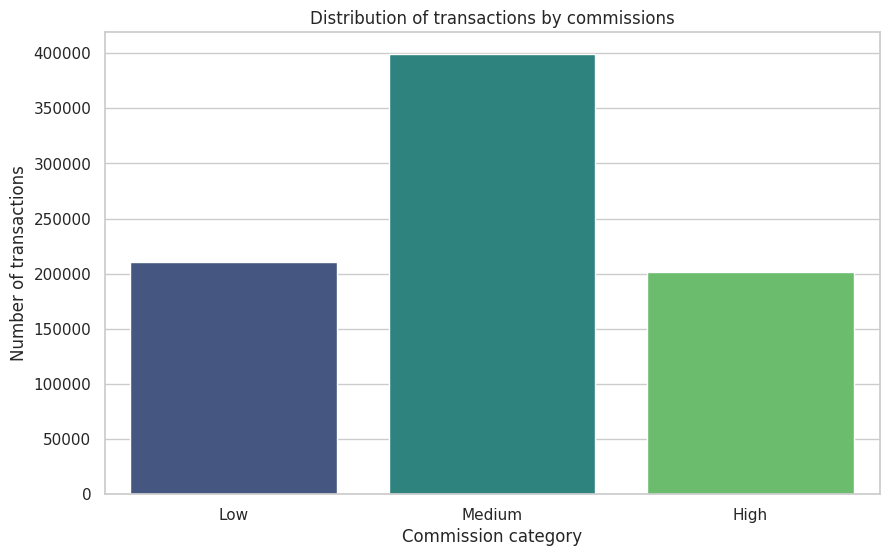

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

#1. Create commission categories

low_fee_threshold = ds['avg_fee_rate'].quantile(0.25)
high_fee_threshold = ds['avg_fee_rate'].quantile(0.75)


#2. Assigning categories

ds['fee_category'] = pd.cut(ds['avg_fee_rate'], bins = [-float('inf'), low_fee_threshold, high_fee_threshold, float('inf')],
                             labels = ['Low', 'Medium', 'High'], include_lowest = True)

#3. Visualization of distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='fee_category', data=ds, palette='viridis')
plt.title('Distribution of transactions by commissions')
plt.xlabel('Commission category')
plt.ylabel('Number of transactions')
plt.show()

# 8. Visualize the distribution of transactions along with block sizes. Distinguish between categories of blocks, for example, by color on the graph.
   - Визуализировать распределение транзакций совместно с размерами блоков. Различать категории блоков, например, цветом на графике.


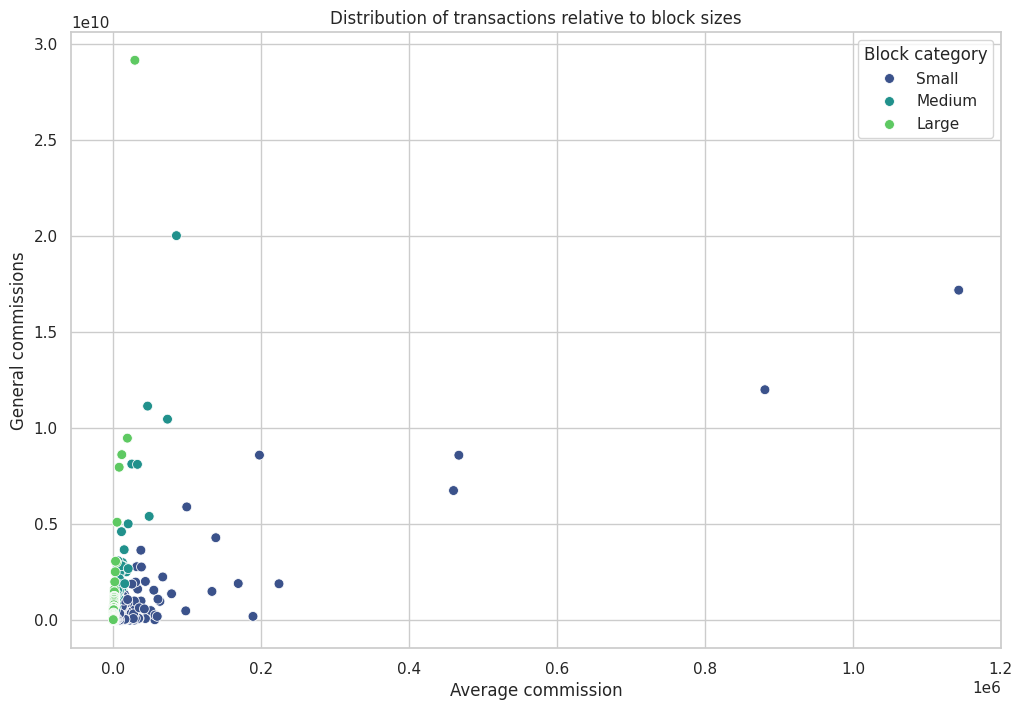

In [75]:
# Create a new column for block categories (you can use your own criteria)

ds['block_category'] = pd.cut(ds['size'], bins = [-float('inf'), 100000, 500000, float('inf')],
                                  labels = ['Small', 'Medium', 'Large'], include_lowest = True)

# Visualization with scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_fee_rate', y='total_fees', hue='block_category', data=ds, palette='viridis', s=50)
plt.title('Distribution of transactions relative to block sizes')
plt.xlabel('Average commission')
plt.ylabel('General commissions')
plt.legend(title='Block category')
plt.show()

Based on this visualization, let's try to guess the T - test.

In [57]:
grouped_data = ds.groupby('size')['avg_fee_rate'].mean()


stat, p_value = ttest_ind(grouped_data, ds['total_fees'])

print(stat, p_value)

-246.0267474370539 0.0


In [74]:
# Formulation of hypotheses
#H0: Average transaction fees are the same for all block sizes.
#H1: Average transaction fees vary for at least one block size.

# T - test

stat, p_value = ttest_ind(grouped_data, ds['total_fees'])

# Output results

print(f"T - statistics: {stat:.4f}")
print(f"p-value: {p_value:.10f}")

# Interpretation of results

if p_value < 0.05:
    print("Reject the null hypothesis. There are statistically significant differences.")
else:
    print("There is no reason to reject the null hypothesis. Average transaction fees are the same.")


T - statistics: -246.0267
p-value: 0.0000000000
Reject the null hypothesis. There are statistically significant differences.


Let's assume the null hypothesis is that the average transaction fee is the same for each block size. Given the result of the T-test, we can reject the null hypothesis due to zero statistical significance and conclude that transaction fees differ across block sizes.

Предположим, нулевая гипотеза - размер средней комиссии транзакции одинаковый для каждого размера блока. Учитывая результат Т - теста, мы можем отвергнуть нулевую гипотезу из за нулевой статистической значимости и сделать вывод, что комиссии транзакций различаются по размерам блоков.

# 9. Predict
 - Предсказание модели


In [59]:
ds.head()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,datetime,year,month,fee_category,block_category
0,1,1231469665000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 02:54:25,2009,1,Low,Small
1,2,1231469744000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 02:55:44,2009,1,Low,Small
2,3,1231470173000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:02:53,2009,1,Low,Small
3,4,1231470988000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:16:28,2009,1,Low,Small
4,5,1231471428000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009-01-09 03:23:48,2009,1,Low,Small


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
#1. Data preparation
X = ds[['tx_count', 'avg_fee_rate']]
y = ds['size']

#2. Data separation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# 3. Model selection

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

#4. Model training

model.fit(X_train, y_train)

#5. Model evaluation

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 58034143225.41314
R² Score: 0.8413315530646354


# 10. Conduct several statistical tests or hypotheses about the influence of various factors on the blockchain parameters.
- Провести несколько статистических тестов или гипотез о влиянии различных факторов на параметры блокчейна.

Formulation of hypotheses:

Define the null hypothesis (H0) and the alternative hypothesis (H1). For example:
H0: The average block size is the same for two different time periods.
H1: The average block size is different for two different time periods.


Формулировка гипотез:

Определите нулевую гипотезу (H0) и альтернативную гипотезу (H1). Например:
H0: Средний размер блока одинаков для двух разных периодов времени.
H1: Средний размер блока различен для двух разных периодов времени.

In [73]:
from scipy.stats import ttest_ind


period1 = ds[ds['year'] < 2020]['size']
period2 = ds[ds['year'] >= 2020]['size']

t_statistic, p_value = ttest_ind(period1, period2)

print(f'T - Statistics: {t_statistic}, p - value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('There is no reason to reject the null hypothesis')


T - Statistics: -726.2198164153551, p - value: 0.0
Reject the null hypothesis


The t-test result indicates that there is a statistically significant difference in block size between the two time periods examined. By rejecting the null hypothesis, we confirm that the average block size is different in the two periods.

This may indicate a change in the Bitcoin blockchain that has resulted in a change in the average block size. When analyzing such results, it is worth paying attention to possible changes in the protocol, mining strategies, or other factors that could affect this parameter of the blockchain.